In [1]:
!pip install lightgbm==2.2.3

In [38]:
import pandas as pd
from pandas import DataFrame
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import lightgbm
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from scipy import stats

In [39]:
df=pd.read_csv('PATH AND FILE', encoding='CP949')
font_name = font_manager.FontProperties(fname="PATH AND FONT").get_name()
rc('font', family=font_name)

df=df.drop(df[(df['gameduration']<=900)].index)

df=df[(df['pick_1']==81) | (df['pick_2']==81) | (df['pick_3']==81) | (df['pick_4']==81) | (df['pick_5']==81)]


ezreal_model=df[[
    'area',
    'gameduration',
    'first_blood',
    'first_tower',
    #'first_inhibitor',
    'first_rift',
    #'first_dragon',
    'dragon_kills',
    #'first_baron',
    'baron_kills',
    'result'
]]
ezreal_model

,area,gameduration,first_blood,first_tower,first_rift,dragon_kills,baron_kills,result
6,100,1119,False,False,False,0,0,Fail
17,200,2323,True,True,False,4,0,Fail
22,100,1758,False,False,False,4,1,Win
29,200,1263,False,False,False,0,0,Fail
30,100,1053,True,True,True,2,0,Win
...,...,...,...,...,...,...,...,...
339620,100,1215,True,False,False,0,0,Fail
339630,100,1922,False,False,False,3,0,Win
339632,100,1801,True,False,False,2,0,Fail
339635,200,1141,True,True,False,2,0,Win


In [40]:
#result와 bool 모두 바꿀 시
ezreal_model['result']=ezreal_model['result'].apply(lambda x: 0 if x == 'Fail' else 1)
ezreal_model['area']=ezreal_model['area'].apply(lambda x: 0 if x == 100 else 1)
ezreal_model['first_blood']=ezreal_model['first_blood'].apply(lambda x: 0 if x ==  False else 1)
ezreal_model['first_tower']=ezreal_model['first_tower'].apply(lambda x: 0 if x ==  False else 1)
#ezreal_model['first_inhibitor']=ezreal_model['first_inhibitor'].apply(lambda x: 0 if x ==  False else 1)
ezreal_model['first_rift']=ezreal_model['first_rift'].apply(lambda x: 0 if x ==  False else 1)
#ezreal_model['first_dragon']=ezreal_model['first_dragon'].apply(lambda x: 0 if x ==  False else 1)
#ezreal_model['first_baron']=ezreal_model['first_baron'].apply(lambda x: 0 if x ==  False else 1)
ezreal_model['gameduration']=ezreal_model['gameduration'].apply(lambda x: 0 if x <= 1800 else 1)

ezreal_model

<ipython-input-40-349dc87eb436>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ezreal_model['result']=ezreal_model['result'].apply(lambda x: 0 if x == 'Fail' else 1)
<ipython-input-40-349dc87eb436>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ezreal_model['area']=ezreal_model['area'].apply(lambda x: 0 if x == 100 else 1)
<ipython-input-40-349dc87eb436>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,area,gameduration,first_blood,first_tower,first_rift,dragon_kills,baron_kills,result
6,0,0,0,0,0,0,0,0
17,1,1,1,1,0,4,0,0
22,0,0,0,0,0,4,1,1
29,1,0,0,0,0,0,0,0
30,0,0,1,1,1,2,0,1
...,...,...,...,...,...,...,...,...
339620,0,0,1,0,0,0,0,0
339630,0,1,0,0,0,3,0,1
339632,0,1,1,0,0,2,0,0
339635,1,0,1,1,0,2,0,1


In [41]:
ezreal_model.area=ezreal_model.area.astype("category")
ezreal_model.first_blood=ezreal_model.first_blood.astype("category")
ezreal_model.first_tower=ezreal_model.first_tower.astype("category")
#ezreal_model.first_inhibitor=ezreal_model.first_inhibitor.astype("category")
ezreal_model.first_rift=ezreal_model.first_rift.astype("category")
#ezreal_model.first_dragon=ezreal_model.first_dragon.astype("category")
#ezreal_model.first_baron=ezreal_model.first_baron.astype("category")
ezreal_model.result=ezreal_model.result.astype("category")
ezreal_model.gameduration=ezreal_model.gameduration.astype("category")

ezreal_model.dtypes

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


area            category
gameduration    category
first_blood     category
first_tower     category
first_rift      category
dragon_kills       int64
baron_kills        int64
result          category
dtype: object

In [42]:
y=ezreal_model.result
x=ezreal_model.drop('result',axis=1)

In [43]:
param = {'boosting_type': 'gbdt','num_leaves':10, 'objective':'binary','max_depth':10,'learning_rate':.05} 
#max_depth, learning rate높이면 과적화,but 변수가 너무 많으면 max_depth 증가(20~30)
param['metric'] = ['auc', 'binary'] #auc가 auccray가 아니라 auc 면적, 지금은 y값이 0,1이라 binary이지만 y값이 2이상이면 다항분포 사용
num_boost_round = 30
early_stopping_rounds = 10 #30번부터 차이가 없으면 30번 이후에서 끝내기
evals_result = {}
num_round = num_boost_round

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)
train_data=lgb.Dataset(x_train,y_train) #label:lgb.dataset함수 내부에 y값 라벨링된 종속변수 의미
lgbm=lgb.train(param,train_data,num_round)
ypred=lgbm.predict(x_test)

#data1 lightGBM AUC
print("ezreal_model AUC") #accuracy가 아니라 면적 auc
print(roc_auc_score(y_test,ypred))

ezreal_model AUC
0.9261305227242661


In [46]:
ypred_result=ypred
#F1 Score맞추기 위해서 하는 것, 모델 2개를 비교할땐 auc,
#여기의 auc는 다 영역임, but 0이 9개 ,1이 1개이면 전부 0이어도 정확성이 높게 나오므로 f1 score이 유의함 0,1 비율 5:5면 acuracy=f1score
for i in range(0,1):
    for j in range(0,len(ypred)):
        #0,1 맞추을 마주는 비율이 거의 같아지는 cut off 값을  찾아서 적용합니다.
        if ypred[j]>0.5:
            ypred_result[j]=1
        else:
            ypred_result[j]=0

print("Crosstab")
print(pd.crosstab(ypred_result,y_test))

Crosstab
result     0     1
row_0             
0.0     7358   996
1.0     1557  7411


In [47]:
arr=pd.crosstab(y_test,ypred_result).to_numpy()
TN=arr[0][0]
TP=arr[1][1]
FN=arr[1][0]
FP=arr[0][1]
recall=TP/(TP+FN)
precision=TP/(TP+FP)
zero=TN/(TN+FP)
f1score=(precision*recall*2)/(precision+recall)

print("0,1 맞추는 비율 (1에 가까워야 0,1 모두 잘 맞추는 결과)")
print(recall/zero)
print("recall")     
print(recall)
print("precision")     
print(precision)

print("f1score")
print(f1score)

0,1 맞추는 비율 (1에 가까워야 0,1 모두 잘 맞추는 결과)
1.068064129889817
recall
0.8815272986796717
precision
0.8263826940231935
f1score
0.8530647482014388


In [48]:
corr=df2.corr(method='pearson')
print(corr)

              dragon_kills  baron_kills
dragon_kills      1.000000     0.474949
baron_kills       0.474949     1.000000


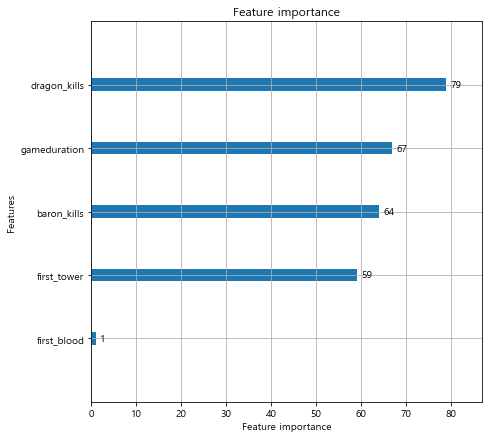

In [49]:
from matplotlib import font_manager, rc


plt.rcParams["figure.figsize"] = (7,7)
plt.rc('font',size=10)
ax = lgb.plot_importance(lgbm, max_num_features=20)
plt.show()

In [51]:
ezreal_model.area=ezreal_model.area.astype("category")
ezreal_model.gameduration=ezreal_model.gameduration.astype("category")
ezreal_model.first_blood=ezreal_model.first_blood.astype("category")
ezreal_model.first_tower=ezreal_model.first_tower.astype("category")
#ezreal_model.first_inhibitor=ezreal_model.first_inhibitor.astype("category")
ezreal_model.first_rift=ezreal_model.first_rift.astype("category")
#ezreal_model.first_dragon=ezreal_model.first_dragon.astype("category")
ezreal_model.dragon_kills=ezreal_model.dragon_kills.astype("category")
#ezreal_model.first_baron=ezreal_model.first_baron.astype("category")
ezreal_model.baron_kills=ezreal_model.baron_kills.astype("category")
ezreal_model.result=ezreal_model.result.astype("category")

ezreal_model.dtypes

area            category
gameduration    category
first_blood     category
first_tower     category
first_rift      category
dragon_kills    category
baron_kills     category
result          category
dtype: object

In [52]:
ezreal_model

,area,gameduration,first_blood,first_tower,first_rift,dragon_kills,baron_kills,result
6,0,0,0,0,0,0,0,0
17,1,1,1,1,0,4,0,0
22,0,0,0,0,0,4,1,1
29,1,0,0,0,0,0,0,0
30,0,0,1,1,1,2,0,1
...,...,...,...,...,...,...,...,...
339620,0,0,1,0,0,0,0,0
339630,0,1,0,0,0,3,0,1
339632,0,1,1,0,0,2,0,0
339635,1,0,1,1,0,2,0,1


In [91]:
#4용을 선택하였을 때
x1=pd.DataFrame({
    'area':0,
    'gameduration':1,
    'first_blood':1,
    'first_tower':1,
    'first_rift':0,
    'dragon_kills':4,
    'baron_kills':0
},index=[0])

x1.area=x1.area.astype("category")
x1.gameduration=x1.gameduration.astype("category")
x1.first_blood=x1.first_blood.astype("category")
x1.first_tower=x1.first_tower.astype("category")
x1.first_rift=x1.first_rift.astype("category")

ypred=lgbm.predict(x1)
ypred_prob= pd.DataFrame([ypred]).transpose()
result=pd.merge(x,ypred_prob,how="outer",left_index=True, right_index=True)

result

,area,gameduration,first_blood,first_tower,first_rift,dragon_kills,baron_kills,0
0,1,1,1,1,0,3,1,0.492563


In [92]:
#바론을 선택하였을 때
x1=pd.DataFrame({
    'area':0,
    'gameduration':1,
    'first_blood':1,
    'first_tower':1,
    'first_rift':0,
    'dragon_kills':3,
    'baron_kills':1
},index=[0])

x1.area=x1.area.astype("category")
x1.gameduration=x1.gameduration.astype("category")
x1.first_blood=x1.first_blood.astype("category")
x1.first_tower=x1.first_tower.astype("category")
x1.first_rift=x1.first_rift.astype("category")

ypred=lgbm.predict(x1)
ypred_prob= pd.DataFrame([ypred]).transpose()
result=pd.merge(x,ypred_prob,how="outer",left_index=True, right_index=True)

result

,area,gameduration,first_blood,first_tower,first_rift,dragon_kills,baron_kills,0
0,1,1,1,1,0,3,1,0.677669
